# **Installing required library**

In [ ]:
!pip install kaggle

In [ ]:
!pip install --upgrade tensorflow
!pip show tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
pip install pydot

In [ ]:
pip install opencv-python

In [ ]:
%pip install opencv-python-headless

In [ ]:
# !apt-get update

In [ ]:
pip install --upgrade keras==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


# **Import required libraries**

In [ ]:
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import zipfile
from sklearn.model_selection import train_test_split

# **Downloading Dataset**

In [ ]:
# Set Kaggle API credentials using environment variables
os.environ['KAGGLE_USERNAME'] = 'biyawalavaibhav'
os.environ['KAGGLE_KEY'] = '8f800b587b5bab9c2424e982dd6b23e6'

In [ ]:
!kaggle datasets download -d tinashri/brain-tumor-dataset-includes-the-mask-and-images

100% 311M/312M [00:16<00:00, 21.9MB/s]
100% 312M/312M [00:16<00:00, 19.6MB/s]


In [ ]:
zip_file_path = '/content/brain-tumor-dataset-includes-the-mask-and-images.zip'
extract_to_directory = '/content/brain_tumor_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

extracted_files = os.listdir(extract_to_directory)
print("Extracted files:", extracted_files)


Extracted files: ['data', 'predict_all.py']


# **Load and pre-processing the images**

In [ ]:
# Define image and mask directories
image_directory = "brain_tumor_dataset/data/data/images/"
mask_directory = "brain_tumor_dataset/data/data/masks"

# Create lists of file paths for images and masks
image_file_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
mask_file_paths = [os.path.join(mask_directory, filename) for filename in os.listdir(mask_directory)]

# Split the lists into training and testing sets
train_image_paths, test_image_paths, train_mask_paths, test_mask_paths = train_test_split(
    image_file_paths, mask_file_paths, test_size=0.2, random_state=42
)
def resize(input_image, input_mask):
    input_image = tf.image.resize(input_image, (128, 128), method="nearest")
    input_mask = tf.image.resize(input_mask, (128, 128), method="nearest")
    return input_image, input_mask

def enhance_contrast(input_image):
    # Apply per-image standardization
    enhanced_image = tf.image.per_image_standardization(input_image)
    return enhanced_image

def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask = tf.cast(input_mask, tf.float32) / 255.0
    return input_image, input_mask

# Define functions to load images and masks from file and preprocess them
def load_image_and_mask(image_path, mask_path):
    input_image = tf.io.read_file(image_path)
    input_image = tf.image.decode_png(input_image, channels=3)
    input_mask = tf.io.read_file(mask_path)
    input_mask = tf.image.decode_png(input_mask, channels=1)
    input_image, input_mask = resize(input_image, input_mask)
    input_image=enhance_contrast(input_image)
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask


# Create TensorFlow datasets from the lists of file paths
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_mask_paths))
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_paths, test_mask_paths))

# Map the loading and preprocessing functions to the datasets
train_dataset = train_dataset.map(load_image_and_mask, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(load_image_and_mask, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
for image, mask in train_dataset.take(10):
    print("Image shape:", image.shape)
    print("Mask shape:", mask.shape)

Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)
Image shape: (128, 128, 3)
Mask shape: (128, 128, 1)


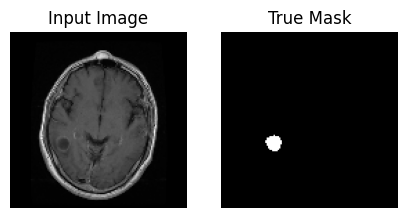

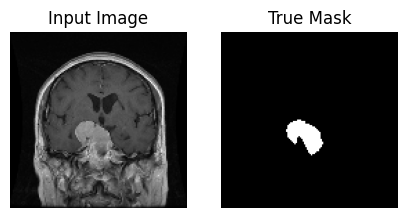

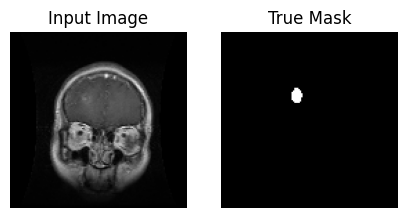

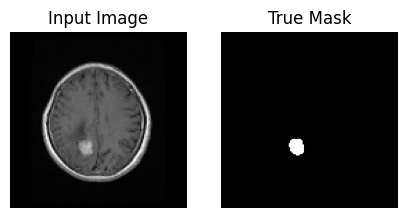

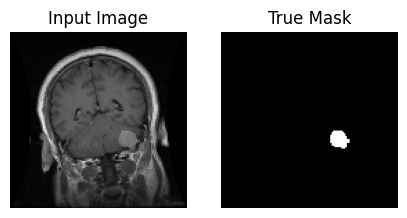

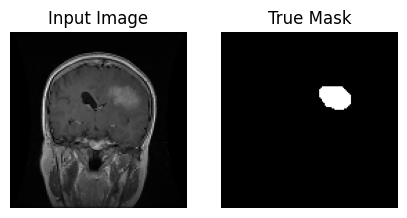

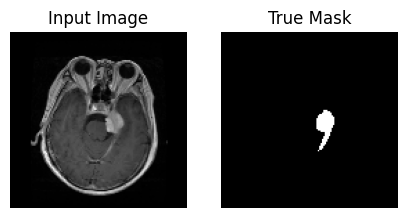

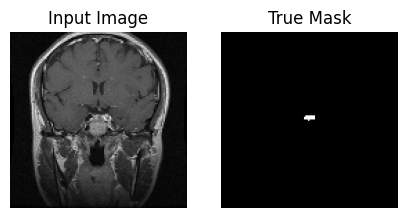

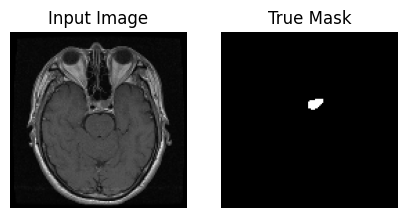

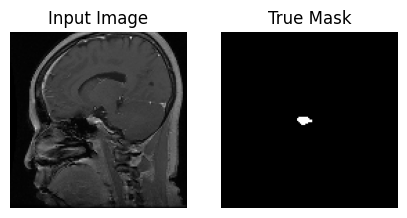

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display(display_list):
    plt.figure(figsize=(5, 5))  # Adjust the figsize if needed
    title = ["Input Image", "True Mask"]
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap='gray')
        plt.axis("off")
    plt.show()

# Create an iterator for the test_batches dataset
test_iterator = iter(test_dataset.take(10))

# Iterate through batches and display images
for _ in range(10):  # You can change the range to display a different number of batches
    # Fetch a sample batch
    sample_batch = next(test_iterator)
    sample_image, sample_mask = sample_batch

    # Display the sample image and mask
    display([sample_image, sample_mask])

In [ ]:
import shutil
c="brain_tumor_dataset/data/data/masks/.ipynb_checkpoints"
if os.path.exists(c):
    shutil.rmtree(c)

# **Build the U-Net Model**

In [ ]:
def double_conv_block(x, n_filters):

    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

In [ ]:
def build_unet_model():

    # inputs
    inputs = layers.Input(shape=(128,128,3))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)

    # outputs
    outputs = layers.Conv2D(3, 1, padding="same", activation = "softmax")(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [ ]:
unet_model = build_unet_model()

In [ ]:
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64, 64, 64)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32, 32, 128)    │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 16, 16, 256)    │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 8, 8, 512)      │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 34,513,475 (131.66 MB)

 Trainable params: 34,513,475 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(unet_model, show_shapes=True, to_file='model.png', expand_nested=True, rankdir='TB')


# **Comipling and fitting the model**

In [ ]:
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [ ]:
NUM_EPOCHS = 100  # Set the number of epochs
BATCH_SIZE = 32
BUFFER_SIZE = 100

train_batches = train_dataset.take(2000).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_batches,len(train_batches))
validation_batches = train_dataset.skip(2000).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(validation_batches,len(validation_batches))

# Train the model with the modified parameters
model_history = unet_model.fit(train_batches,
                               epochs=NUM_EPOCHS,
                              validation_data=validation_batches )

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None))> 63
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None))> 15
Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9230 - loss: 0.3176 - val_accuracy: 0.9830 - val_loss: 0.0729
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 558ms/step - accuracy: 0.9837 - loss: 0.0642 - val_accuracy: 0.9830 - val_loss: 0.0579
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 533ms/step - accuracy: 0.9837 - loss: 0.0548 - val_accuracy: 0.9830 - val_loss: 0.0548
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 545ms/step - accuracy: 0.9835 - loss: 0.0530 - val_accuracy: 0.9830 - val_loss: 0.0534
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 547ms/step - accuracy: 0.9838 - loss: 0.0492 - val_accuracy: 0.9850 - val_loss: 0.0474
Epoch 6/100
63

# **Visualizing the loss and accuracy**

In [ ]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(NUM_EPOCHS)

    fig = plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validataion accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validataion loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

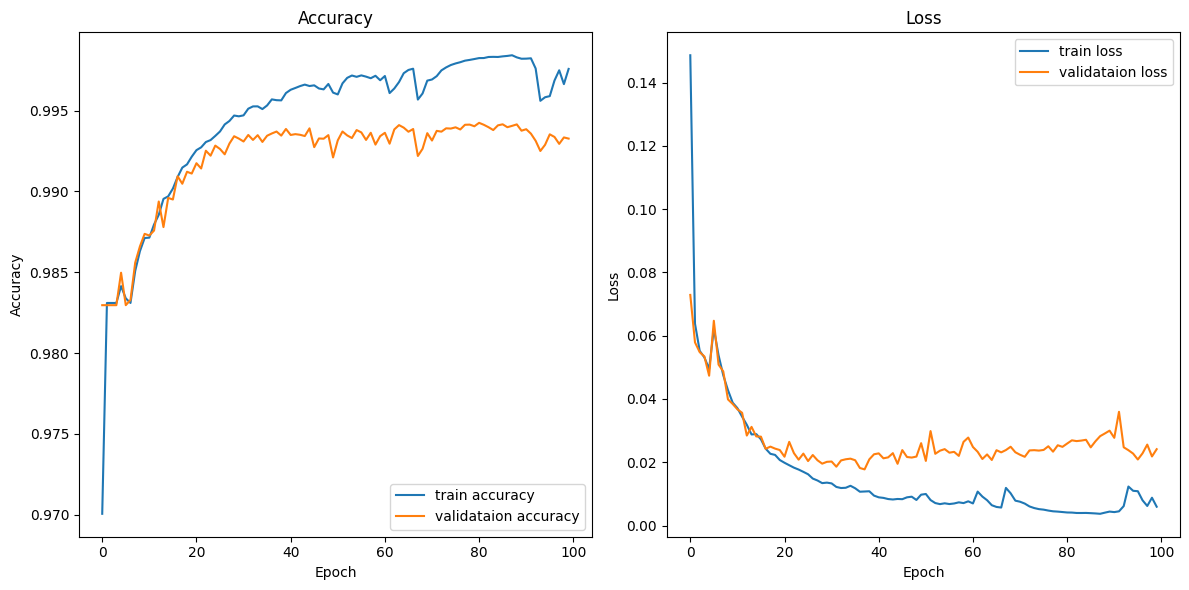

In [ ]:
# Display learning curves
display_learning_curves(unet_model.history)

# **Evaluating the model by Visualizing the model**

In [ ]:
test_batches = test_dataset.take(613).batch(1)
count = 0
for i in test_batches:
    count +=1

print("number of batches:", count)

number of batches: 613


In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet_model.predict(image)
            display_2([image[0], mask[0], create_mask(pred_mask)])
    else:
        display_2([sample_image, sample_mask,
                 create_mask(unet_model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
def display_2(display_list):
    plt.figure(figsize=(8, 10))
    title = ["Input Image", "True Mask","Predicted_Mask"]
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap = 'gray')
        plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


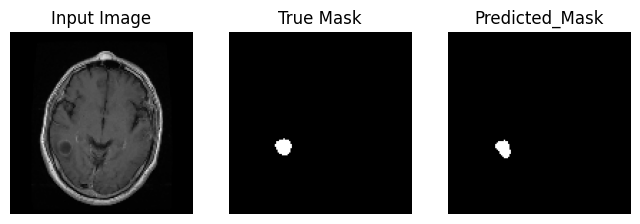

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


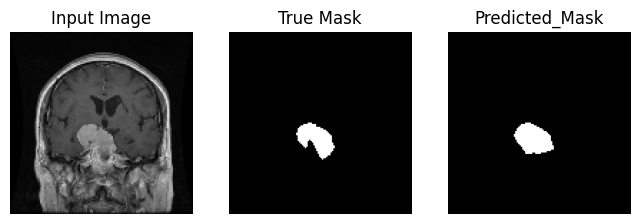

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


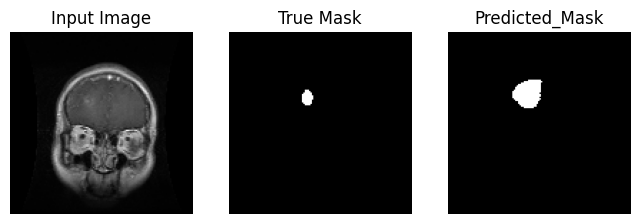

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


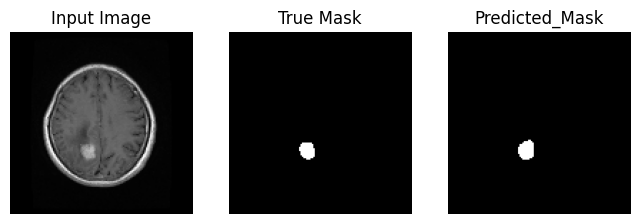

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


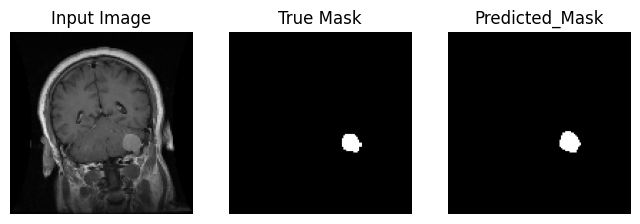

In [ ]:
show_predictions(test_batches.take(5), 5)

# **Save the model and loading it again for use**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unet_model.save("/content/drive/MyDrive/MV/Unet_model")
# unet_model.save("/content/drive/MyDrive/MV/Unet_model.h5")
# unet_model.save("/content/drive/MyDrive/MV/Unet_model.pl")
unet_model.save("/content/drive/MyDrive/MV/Unet model keras version 3.1.1/Unet_model.keras")

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MV/Unet model keras version 3.1.1/Unet_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


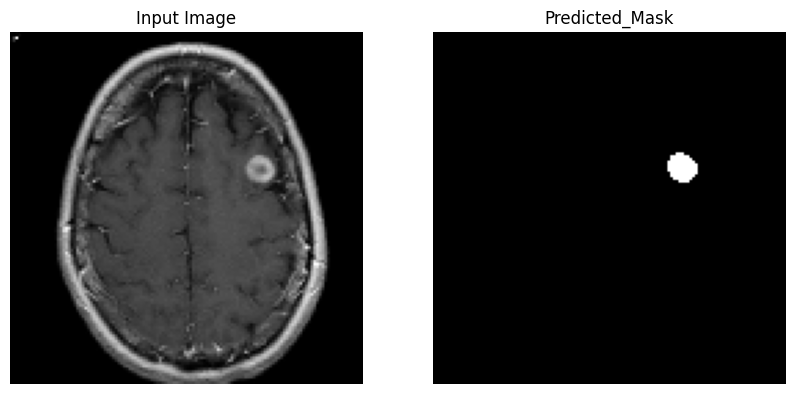

In [ ]:
# Define image directory
image_directory = "/content"

# Get only files from the image directory
image_file_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, filename))]

# Define preprocessing functions
def resize(input_image):
    input_image = tf.image.resize(input_image, (128, 128), method="nearest")
    input_image.set_shape([128, 128, 3])  # Explicitly set the shape
    return input_image

def enhance_contrast(input_image):
    enhanced_image = tf.image.per_image_standardization(input_image)
    return enhanced_image

def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image

def load_image_and_preprocess(image_path):
    input_image = tf.io.read_file(image_path)
    input_image = tf.image.decode_png(input_image, channels=3)
    input_image = resize(input_image)
    input_image = enhance_contrast(input_image)
    input_image = normalize(input_image)
    return input_image

def display_2(display_list):
    plt.figure(figsize=(10, 12))
    title = ["Input Image","Predicted_Mask"]
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap = 'gray')
        plt.axis("off")
        plt.savefig('mask_1.png')
    plt.show()

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]


def show_predictions(dataset=None, num=1):
  if dataset:
    for image in dataset.take(num):
      pred_mask = new_model.predict(image)
      display_2([image[0], create_mask(pred_mask)])

# Create a TensorFlow dataset from the list of file paths
image_dataset = tf.data.Dataset.from_tensor_slices(image_file_paths)

# Map the loading and preprocessing function to the dataset
image_dataset = image_dataset.map(load_image_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_batches = image_dataset.take(1).batch(1)

# Now, you can iterate through the dataset and predict
 # Take a single batch for demonstration
show_predictions(test_batches.take(1),1)

# **Different Scores**

In [ ]:
import numpy as np

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    pred_mask = tf.cast(pred_mask,tf.float32)
    return pred_mask[0]

def accuracy_score(y_true, y_pred):
    correct_predictions = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32))
    total_pixels = tf.reduce_prod(tf.shape(y_true))
    total_pixels = tf.cast(total_pixels,tf.float32)
    return correct_predictions / total_pixels

def dice_coef(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection) / (union + 1e-7)

def jaccard_score(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    jaccard = intersection / union
    return jaccard

def precision_score(y_true, y_pred):
    true_positives = tf.reduce_sum(y_true * y_pred)
    false_positives = tf.reduce_sum(y_pred) - true_positives
    return true_positives / (true_positives + false_positives + 1e-7)

def recall_score(y_true, y_pred):
    true_positives = tf.reduce_sum(y_true * y_pred)
    false_negatives = tf.reduce_sum(y_true) - true_positives
    return true_positives / (true_positives + false_negatives + 1e-7)

def specificity_score(y_true, y_pred):
    true_negatives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 0)), tf.float32))
    false_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 1)), tf.float32))
    return true_negatives / (true_negatives + false_positives + 1e-7)

def show_predictions(dataset=None, num=1):
    if dataset:
        accuracy_scores = []
        dice_scores = []
        jaccard_scores = []
        precisions = []
        recalls = []
        specificity_scores = []
        for image, mask in dataset.take(num):
            pred_mask = new_model.predict(image)
            pred_mask = create_mask(pred_mask)
            accuracy = accuracy_score(mask, pred_mask)
            dice = dice_coef(mask,pred_mask)
            jaccard = jaccard_score(mask, pred_mask)
            precision = precision_score(mask, pred_mask)
            recall = recall_score(mask, pred_mask)
            specificity = specificity_score(mask, pred_mask)
            accuracy_scores.append(accuracy.numpy())
            dice_scores.append(dice.numpy())
            jaccard_scores.append(jaccard.numpy())
            precisions.append(precision)
            recalls.append(recall)
            specificity_scores.append(specificity.numpy())

        mean_accuracy = np.mean(accuracy_scores)
        mean_dice = np.mean(dice_scores)
        mean_jaccard = np.mean(jaccard_scores)
        mean_precision = np.mean(precisions)
        mean_recall = np.mean(recalls)
        mean_specificity= np.mean(specificity_scores)
        return mean_accuracy, mean_dice, mean_jaccard, mean_precision, mean_recall, mean_specificity

test_batches = test_dataset.take(613).batch(1)

accuracy, dice, jaccard, precision, recall, specificity = show_predictions(test_batches.take(613), 613)
print("Mean accuracy:", accuracy)
print("Mean Dice coefficient:", dice)
print("Mean Jaccard score:", jaccard)
print("Mean Precision:", precision)
print("Mean Recall:", recall)
print("Mean specificity:", specificity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━